### Predicting whether a sequence of heads or tails of length 20 was computer generated or human written
#### Recurrent Neural Network:
##### Hopefully can use previous H/T to help with predictions
##### I made the H/T into a tiny word vector so we'll see hehe

In [1]:
from keras.layers import SimpleRNN, Dense
from keras.models import Sequential
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
import numpy as np
import util

In [2]:
# Load data
X_train, y_train, X_test, y_test = util.load_rnn_data()
print("X_train", X_train[:5])
print("y_train", y_train[:5])

X_train [[[1]
  [0]
  [0]
  [1]
  [1]
  [1]
  [1]
  [1]
  [0]
  [0]
  [0]
  [1]
  [0]
  [1]
  [0]
  [1]
  [0]
  [1]
  [0]
  [0]]

 [[0]
  [0]
  [0]
  [1]
  [1]
  [1]
  [1]
  [1]
  [0]
  [0]
  [0]
  [1]
  [0]
  [1]
  [1]
  [0]
  [0]
  [1]
  [0]
  [1]]

 [[0]
  [0]
  [0]
  [1]
  [0]
  [0]
  [0]
  [1]
  [1]
  [0]
  [1]
  [0]
  [0]
  [1]
  [1]
  [1]
  [0]
  [1]
  [0]
  [0]]

 [[1]
  [1]
  [0]
  [1]
  [0]
  [0]
  [1]
  [1]
  [1]
  [0]
  [1]
  [0]
  [1]
  [0]
  [1]
  [0]
  [0]
  [0]
  [1]
  [1]]

 [[1]
  [0]
  [0]
  [0]
  [0]
  [0]
  [0]
  [0]
  [1]
  [1]
  [1]
  [0]
  [0]
  [0]
  [1]
  [0]
  [1]
  [0]
  [1]
  [1]]]
y_train [1 0 0 1 0]


In [3]:
# Create Simple RNN model
model = Sequential()
model.add(SimpleRNN(30, input_shape=(20,1,), activation="relu"))
model.add(Dense(units=1, activation="sigmoid"))
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

Metal device set to: Apple M1

systemMemory: 16.00 GB
maxCacheSize: 5.33 GB



2023-01-15 22:47:57.775801: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:306] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2023-01-15 22:47:57.775938: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:272] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)


In [4]:
# Train
rnn = model.fit(X_train, y_train, validation_data = (X_test,y_test), batch_size=20, epochs=10)

Epoch 1/10


2023-01-15 22:47:58.490633: W tensorflow/core/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz
2023-01-15 22:47:59.435534: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


61/61 [==============================] - ETA: 0s - loss: 0.6993 - accuracy: 0.4971

2023-01-15 22:48:12.905591: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


61/61 [==============================] - 15s 213ms/step - loss: 0.6993 - accuracy: 0.4971 - val_loss: 0.6917 - val_accuracy: 0.5259
Epoch 2/10
61/61 [==============================] - 12s 196ms/step - loss: 0.6911 - accuracy: 0.5045 - val_loss: 0.6899 - val_accuracy: 0.5111
Epoch 3/10
61/61 [==============================] - 9s 145ms/step - loss: 0.6740 - accuracy: 0.6373 - val_loss: 0.6050 - val_accuracy: 0.7037
Epoch 4/10
61/61 [==============================] - 8s 139ms/step - loss: 0.5648 - accuracy: 0.7214 - val_loss: 0.5270 - val_accuracy: 0.7630
Epoch 5/10
61/61 [==============================] - 7s 118ms/step - loss: 0.5122 - accuracy: 0.7469 - val_loss: 0.4539 - val_accuracy: 0.7926
Epoch 6/10
61/61 [==============================] - 7s 113ms/step - loss: 0.4864 - accuracy: 0.7692 - val_loss: 0.4302 - val_accuracy: 0.8444
Epoch 7/10
61/61 [==============================] - 7s 114ms/step - loss: 0.4753 - accuracy: 0.7733 - val_loss: 0.4513 - val_accuracy: 0.8000
Epoch 8/10
61/6

In [5]:
# Get Predictions
y_pred = model.predict(X_test)

# Rounding sigmoid output for classification
pred = list()
for i in range(len(y_pred)):
    pred.append(round(y_pred[i][0]))
pred = np.array(pred)
print(pred)

3/5 [=================>............] - ETA: 0s

2023-01-15 22:49:24.984091: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


5/5 [==============================] - 0s 66ms/step
[0 1 1 0 1 0 1 1 0 1 1 1 0 1 0 1 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 1 0 0 1 0 0 0 0 0 0 1 0 0 0 1 0 0 0 1 0 0 0 0 1 0 0 0 1 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 1 0 1 0 0 1 0 0 0 0 0 0 1 1 1 1 1 0 0 0 1 0 1 0 0 0
 0 0 0 0 0 0 0 1 0 0 1 0 1 0 0 0 0 0 0 0 0 1 1 0]


In [6]:
a = accuracy_score(pred,y_test)
print('Accuracy is:', a*100)
# Das pretty good ngl

Accuracy is: 78.51851851851852


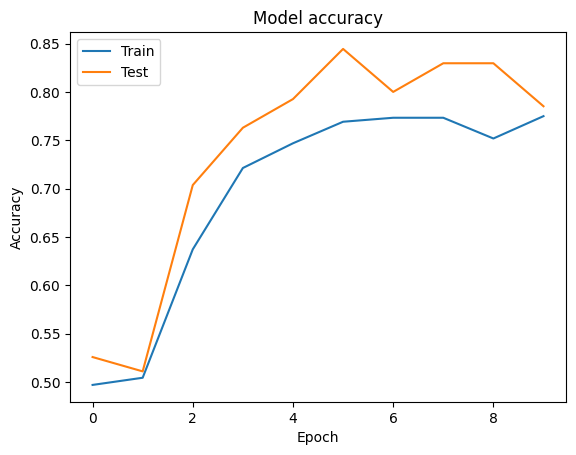

In [7]:
# PLOT ACCURACY!!!
plt.plot(rnn.history['accuracy'])
plt.plot(rnn.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()
# Idk why test is that much better lol
# Still seems like it's going up but cut at 10 epochs so my computer doesn't die :(

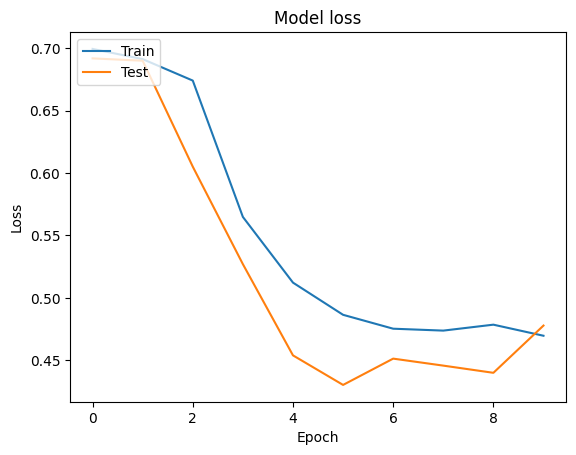

In [8]:
# Plot loss
plt.plot(rnn.history['loss']) 
plt.plot(rnn.history['val_loss']) 
plt.title('Model loss') 
plt.ylabel('Loss') 
plt.xlabel('Epoch') 
plt.legend(['Train', 'Test'], loc='upper left') 
plt.show()

In [9]:
util.predict_rnn(util.random_coinflip(), model)
util.predict_rnn("hthththththththththt", model)

1/1 [==============================] - 0s 246ms/step
Model prediction of ttttthtttthtthhthhhh: 0.763220% Computer
1/1 [==============================] - 0s 60ms/step
Model prediction of hthththththththththt: 0.974119% Human


In [10]:
model.save("./models/rnn")

INFO:tensorflow:Assets written to: ./models/rnn/assets
